In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv', encoding='latin-1')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Preprocessing

In [4]:
data.shape

(7920, 3)

In [7]:
data.groupby('tweet').describe()

id                      \
                                                   count    mean std     min   
tweet                                                                          
 #Thanksgiving! Decided to forgo the traditiona...   1.0  3471.0 NaN  3471.0   
 when itunes decides to restore my ENTIRE phone...   1.0  6002.0 NaN  6002.0   
# valentine's #day :) #yellow #nails #brown #ha...   1.0  7315.0 NaN  7315.0   
#$&@*# apple you #suck RT @PCMag: Report: Apple...   1.0  3058.0 NaN  3058.0   
#100happydays day12: DIY cord protector. Thanks...   1.0  2032.0 NaN  2032.0   
...                                                  ...     ...  ..     ...   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...   1.0  2026.0 NaN  2026.0   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...   1.0  7847.0 NaN  7847.0   
æå¥½çä¹ oneplus_official oneplus_gallery @...   1.0  1800.0 NaN  1800.0   
îHappy Birthday Steve Jobs!! î
You have made...   1.0  7632.0 NaN  7632.0   
ï½¡â· ð ðððð-ððð¶ð¹ ð...   1.0  1076.0 NaN  1076.0   

                                                                            \
                                                       25%     50%     75%   
tweet                                                                        
 #Thanksgiving! Decided to forgo the traditiona...  3471.0  3471.0  3471.0   
 when itunes decides to restore my ENTIRE phone...  6002.0  6002.0  6002.0   
# valentine's #day :) #yellow #nails #brown #ha...  7315.0  7315.0  7315.0   
#$&@*# apple you #suck RT @PCMag: Report: Apple...  3058.0  3058.0  3058.0   
#100happydays day12: DIY cord protector. Thanks...  2032.0  2032.0  2032.0   
...                                                    ...     ...     ...   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  2026.0  2026.0  2026.0   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  7847.0  7847.0  7847.0   
æå¥½çä¹ oneplus_official oneplus_gallery @...  1800.0  1800.0  1800.0   
îHappy Birthday Steve Jobs!! î
You have made...  7632.0  7632.0  7632.0   
ï½¡â· ð ðððð-ððð¶ð¹ ð...  1076.0  1076.0  1076.0   

                                                           label           \
                                                       max count mean std   
tweet                                                                       
 #Thanksgiving! Decided to forgo the traditiona...  3471.0   1.0  0.0 NaN   
 when itunes decides to restore my ENTIRE phone...  6002.0   1.0  1.0 NaN   
# valentine's #day :) #yellow #nails #brown #ha...  7315.0   1.0  0.0 NaN   
#$&@*# apple you #suck RT @PCMag: Report: Apple...  3058.0   1.0  1.0 NaN   
#100happydays day12: DIY cord protector. Thanks...  2032.0   1.0  0.0 NaN   
...                                                    ...   ...  ...  ..   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  2026.0   1.0  0.0 NaN   
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  7847.0   1.0  0.0 NaN   
æå¥½çä¹ oneplus_official oneplus_gallery @...  1800.0   1.0  0.0 NaN   
îHappy Birthday Steve Jobs!! î
You have made...  7632.0   1.0  0.0 NaN   
ï½¡â· ð ðððð-ððð¶ð¹ ð...  1076.0   1.0  0.0 NaN   

                                                                             
                                                    min  25%  50%  75%  max  
tweet                                                                        
 #Thanksgiving! Decided to forgo the traditiona...  0.0  0.0  0.0  0.0  0.0  
 when itunes decides to restore my ENTIRE phone...  1.0  1.0  1.0  1.0  1.0  
# valentine's #day :) #yellow #nails #brown #ha...  0.0  0.0  0.0  0.0  0.0  
#$&@*# apple you #suck RT @PCMag: Report: Apple...  1.0  1.0  1.0  1.0  1.0  
#100happydays day12: DIY cord protector. Thanks...  0.0  0.0  0.0  0.0  0.0  
...                                                 ...  ...  ...  ...  ...  
â #FOLLOWTRICK â RETWEET â FOLLOW ALL WHO...  0.0  0.

In [8]:
data = data.drop_duplicates()

### Text Preprocessing

In [9]:
import re
import string

convert to uppercase to lowercase

In [10]:
data['tweet'] = data['tweet'].apply(lambda sentence : " ".join(word.lower() for word in sentence.split()))
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


remove links

In [11]:
data['tweet'] = data['tweet'].apply(lambda sentence : " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', word, flags = re.MULTILINE) for word in sentence.split()))
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


remove punctuations

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


remove numbers

In [14]:
data['tweet'] = data['tweet'].str.replace('\d+', '', regex = True)

remove stopwords

In [79]:
!pip install nltk

In [15]:
import nltk

In [81]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [17]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [18]:
data['tweet'] = data['tweet'].apply(lambda sentence : " ".join(word for word in sentence.split() if word not in sw))

In [19]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


stemming

In [20]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [21]:
data['tweet'] = data['tweet'].apply(lambda  sentence : " ".join(ps.stem(word) for word in sentence.split()))

In [22]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


## create vocabulary

In [23]:
from collections import Counter
vocab = Counter()

In [24]:
vocab

Counter()

In [25]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [26]:
len(vocab)

15956

In [27]:
token = [key for key in vocab if vocab[key] > 10]

In [28]:
len(token)

1145

In [29]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' ,encoding='utf-8')
    file.write(data)
    file.close()


In [30]:
save_vocabulary(token, '../static/model/vocabulary.txt')

## divide dataset

In [97]:
!pip install scikit-learn

In [31]:
from sklearn.model_selection import train_test_split
x = data['tweet']
y = data['label']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## vectorization

In [33]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []

    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype = np.float32)
    return vectorized_lst_new

In [34]:
vectorized_x_train = vectorizer(x_train, token)

In [35]:
vectorized_x_test = vectorizer(x_test, token)

## check data set

In [36]:
y_train.value_counts()

label
0    4715
1    1621
Name: count, dtype: int64

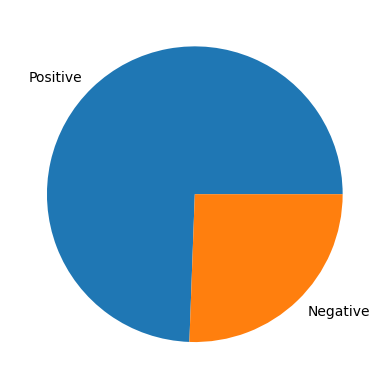

In [37]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ["Positive", "Negative"])
plt.show()

## handle imbalanced dataset

In [105]:
!pip install imbalanced-learn

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)

In [41]:
y_train_smote.value_counts()

label
0    4715
1    4715
Name: count, dtype: int64

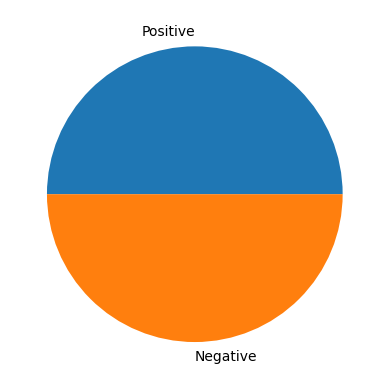

In [42]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ["Positive", "Negative"])
plt.show()

In [43]:
x_train = vectorized_x_train_smote 
y_train = y_train_smote
x_test = vectorized_x_test

# Model Building and Evaluations

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Evaluate model

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [46]:
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Score :\n\tAccuracy = {acc}\n\tPrecision = {pre}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [47]:
def validating_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Score :\n\tAccuracy = {acc}\n\tPrecision = {pre}\n\tRecall = {rec}\n\tF1-Score = {f1}')

Logistic Regression

In [48]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = lr.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 0.941
	Precision = 0.916
	Recall = 0.972
	F1-Score = 0.943
Testing Score :
	Accuracy = 0.867
	Precision = 0.706
	Recall = 0.82
	F1-Score = 0.759


Naive Bayes

In [49]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

y_train_pred = nb.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = nb.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 0.904
	Precision = 0.868
	Recall = 0.953
	F1-Score = 0.909
Testing Score :
	Accuracy = 0.867
	Precision = 0.68
	Recall = 0.906
	F1-Score = 0.777


Decision Tree

In [50]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_train_pred = dtc.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = dtc.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Score :
	Accuracy = 0.823
	Precision = 0.656
	Recall = 0.649
	F1-Score = 0.653


Random Forest

In [51]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = rf.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Score :
	Accuracy = 0.866
	Precision = 0.749
	Recall = 0.716
	F1-Score = 0.732


Support Vector Machine

In [52]:
svm = SVC()
svm.fit(x_train, y_train)

y_train_pred = svm.predict(x_train)
training_scores(y_train, y_train_pred)

y_test_pred = svm.predict(x_test)
validating_scores(y_test, y_test_pred)

Training Score :
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.996
	F1-Score = 0.979
Testing Score :
	Accuracy = 0.866
	Precision = 0.722
	Recall = 0.77
	F1-Score = 0.746


# Save Model

In [121]:
import pickle

with open ('../static/model/model.pickle', 'wb') as file:
    pickle.dump(svm, file)